In [73]:
import pandas as pd
import numpy as np

In [74]:
sp500 = pd.read_csv('sp500.csv')

In [75]:
sp500.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1950-01-03,16.66,16.66,16.66,16.66,1260000,0,0
1,1950-01-04,16.85,16.85,16.85,16.85,1890000,0,0
2,1950-01-05,16.93,16.93,16.93,16.93,2550000,0,0
3,1950-01-06,16.98,16.98,16.98,16.98,2010000,0,0
4,1950-01-09,17.08,17.08,17.08,17.08,2520000,0,0


In [76]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18292 entries, 0 to 18291
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18292 non-null  object 
 1   Open          18292 non-null  float64
 2   High          18292 non-null  float64
 3   Low           18292 non-null  float64
 4   Close         18292 non-null  float64
 5   Volume        18292 non-null  int64  
 6   Dividends     18292 non-null  int64  
 7   Stock Splits  18292 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 1.1+ MB


In [77]:
sp500['Date']= pd.to_datetime(sp500['Date'])

<Axes: >

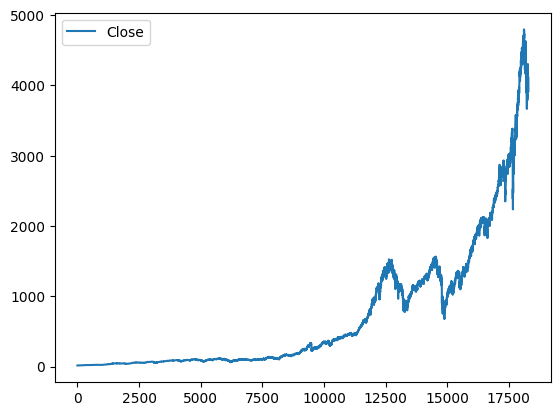

In [78]:
sp500.plot.line(y= "Close", use_index=True)

In [79]:
del sp500['Dividends']
del sp500['Stock Splits']

In [80]:
import matplotlib.pyplot as plt

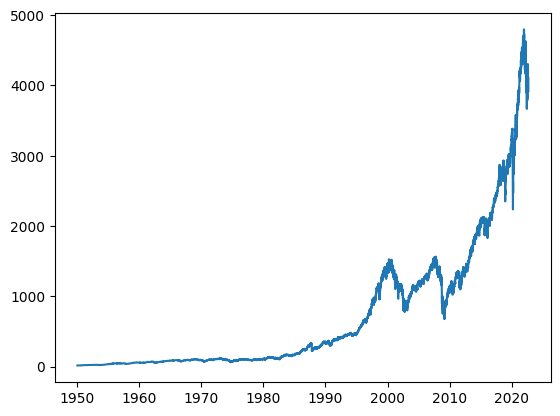

In [81]:
plt.plot(sp500['Date'],sp500['Close'])
plt.show()

In [82]:
sp500['Tomorrow']  = sp500['Close'].shift(-1)

In [83]:
sp500.head()

,Date,Open,High,Low,Close,Volume,Tomorrow
0,1950-01-03,16.66,16.66,16.66,16.66,1260000,16.850000
1,1950-01-04,16.85,16.85,16.85,16.85,1890000,16.930000
2,1950-01-05,16.93,16.93,16.93,16.93,2550000,16.980000
3,1950-01-06,16.98,16.98,16.98,16.98,2010000,17.080000
4,1950-01-09,17.08,17.08,17.08,17.08,2520000,17.030001


In [84]:
sp500['Target'] = (sp500['Tomorrow'] > sp500['Close']).astype(int)

In [85]:
sp500.head()

,Date,Open,High,Low,Close,Volume,Tomorrow,Target
0,1950-01-03,16.66,16.66,16.66,16.66,1260000,16.850000,1
1,1950-01-04,16.85,16.85,16.85,16.85,1890000,16.930000,1
2,1950-01-05,16.93,16.93,16.93,16.93,2550000,16.980000,1
3,1950-01-06,16.98,16.98,16.98,16.98,2010000,17.080000,1
4,1950-01-09,17.08,17.08,17.08,17.08,2520000,17.030001,0


In [86]:
sp500 = sp500.loc[sp500['Date'] >= "1990-01-01"].copy()


In [87]:
sp500

,Date,Open,High,Low,Close,Volume,Tomorrow,Target
10054,1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
10055,1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
10056,1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
10057,1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
10058,1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...,...
18287,2022-09-06,3930.889893,3942.550049,3886.750000,3908.189941,2209800080,3979.870117,1
18288,2022-09-07,3909.429932,3987.889893,3906.030029,3979.870117,0,4006.179932,1
18289,2022-09-08,3959.939941,4010.500000,3944.810059,4006.179932,0,4067.360107,1
18290,2022-09-09,4022.939941,4076.810059,4022.939941,4067.360107,0,4107.279785,1


In [88]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

In [90]:
train = sp500.iloc[:-100]
test = sp500.iloc[:-100]

predictors = ['Close', 'Volume', 'Open', 'High', 'Low']
model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [92]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [93]:
preds = pd.Series(preds, index=test.index)

In [94]:
precision_score(test["Target"], preds)

np.float64(0.7093605189990733)

In [96]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds= pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined
    

In [97]:
def backtest(data, model , predictors, start = 2500, step=250):
    all_predictions =[]
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)
        

In [98]:
predictions = backtest(sp500, model, predictors)

In [99]:
predictions['predictions'].value_counts()

predictions
0    3337
1    2401
Name: count, dtype: int64

In [101]:
precision_score(predictions['Target'], predictions['predictions'])

np.float64(0.534777176176593)

In [102]:
predictions["Target"].value_counts()/predictions.shape[0]

Target
1    0.536075
0    0.463925
Name: count, dtype: float64